In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import efficient_su2

from Quantum_Games import player, game_circuit, get_aer_result, prisoners_dilemma_payoff_calculator

In [54]:
n_players = 10

In [55]:
def generate_random_player(index):
    params = [(np.random.uniform(0, 4 * np.pi), np.random.uniform(0, 4 * np.pi)) for _ in range(10)]
    strategies = [efficient_su2(1, reps=0).assign_parameters(parameters=param) for param in params]
    probabilities = [1/len(strategies) for _ in range(len(strategies))]

    return player(name=f'player_{index}', strategies=strategies, probabilities=probabilities)

players = [generate_random_player(i) for i in range(n_players)]

In [ ]:
#from qiskit import QuantumCircuit

#classical_long = QuantumCircuit(1)
#classical_long.x(0)

#classical_short = QuantumCircuit(1)

#classical_player = player(name='classcial', strategies=[classical_long,])

In [56]:
circuit = game_circuit(players=players)

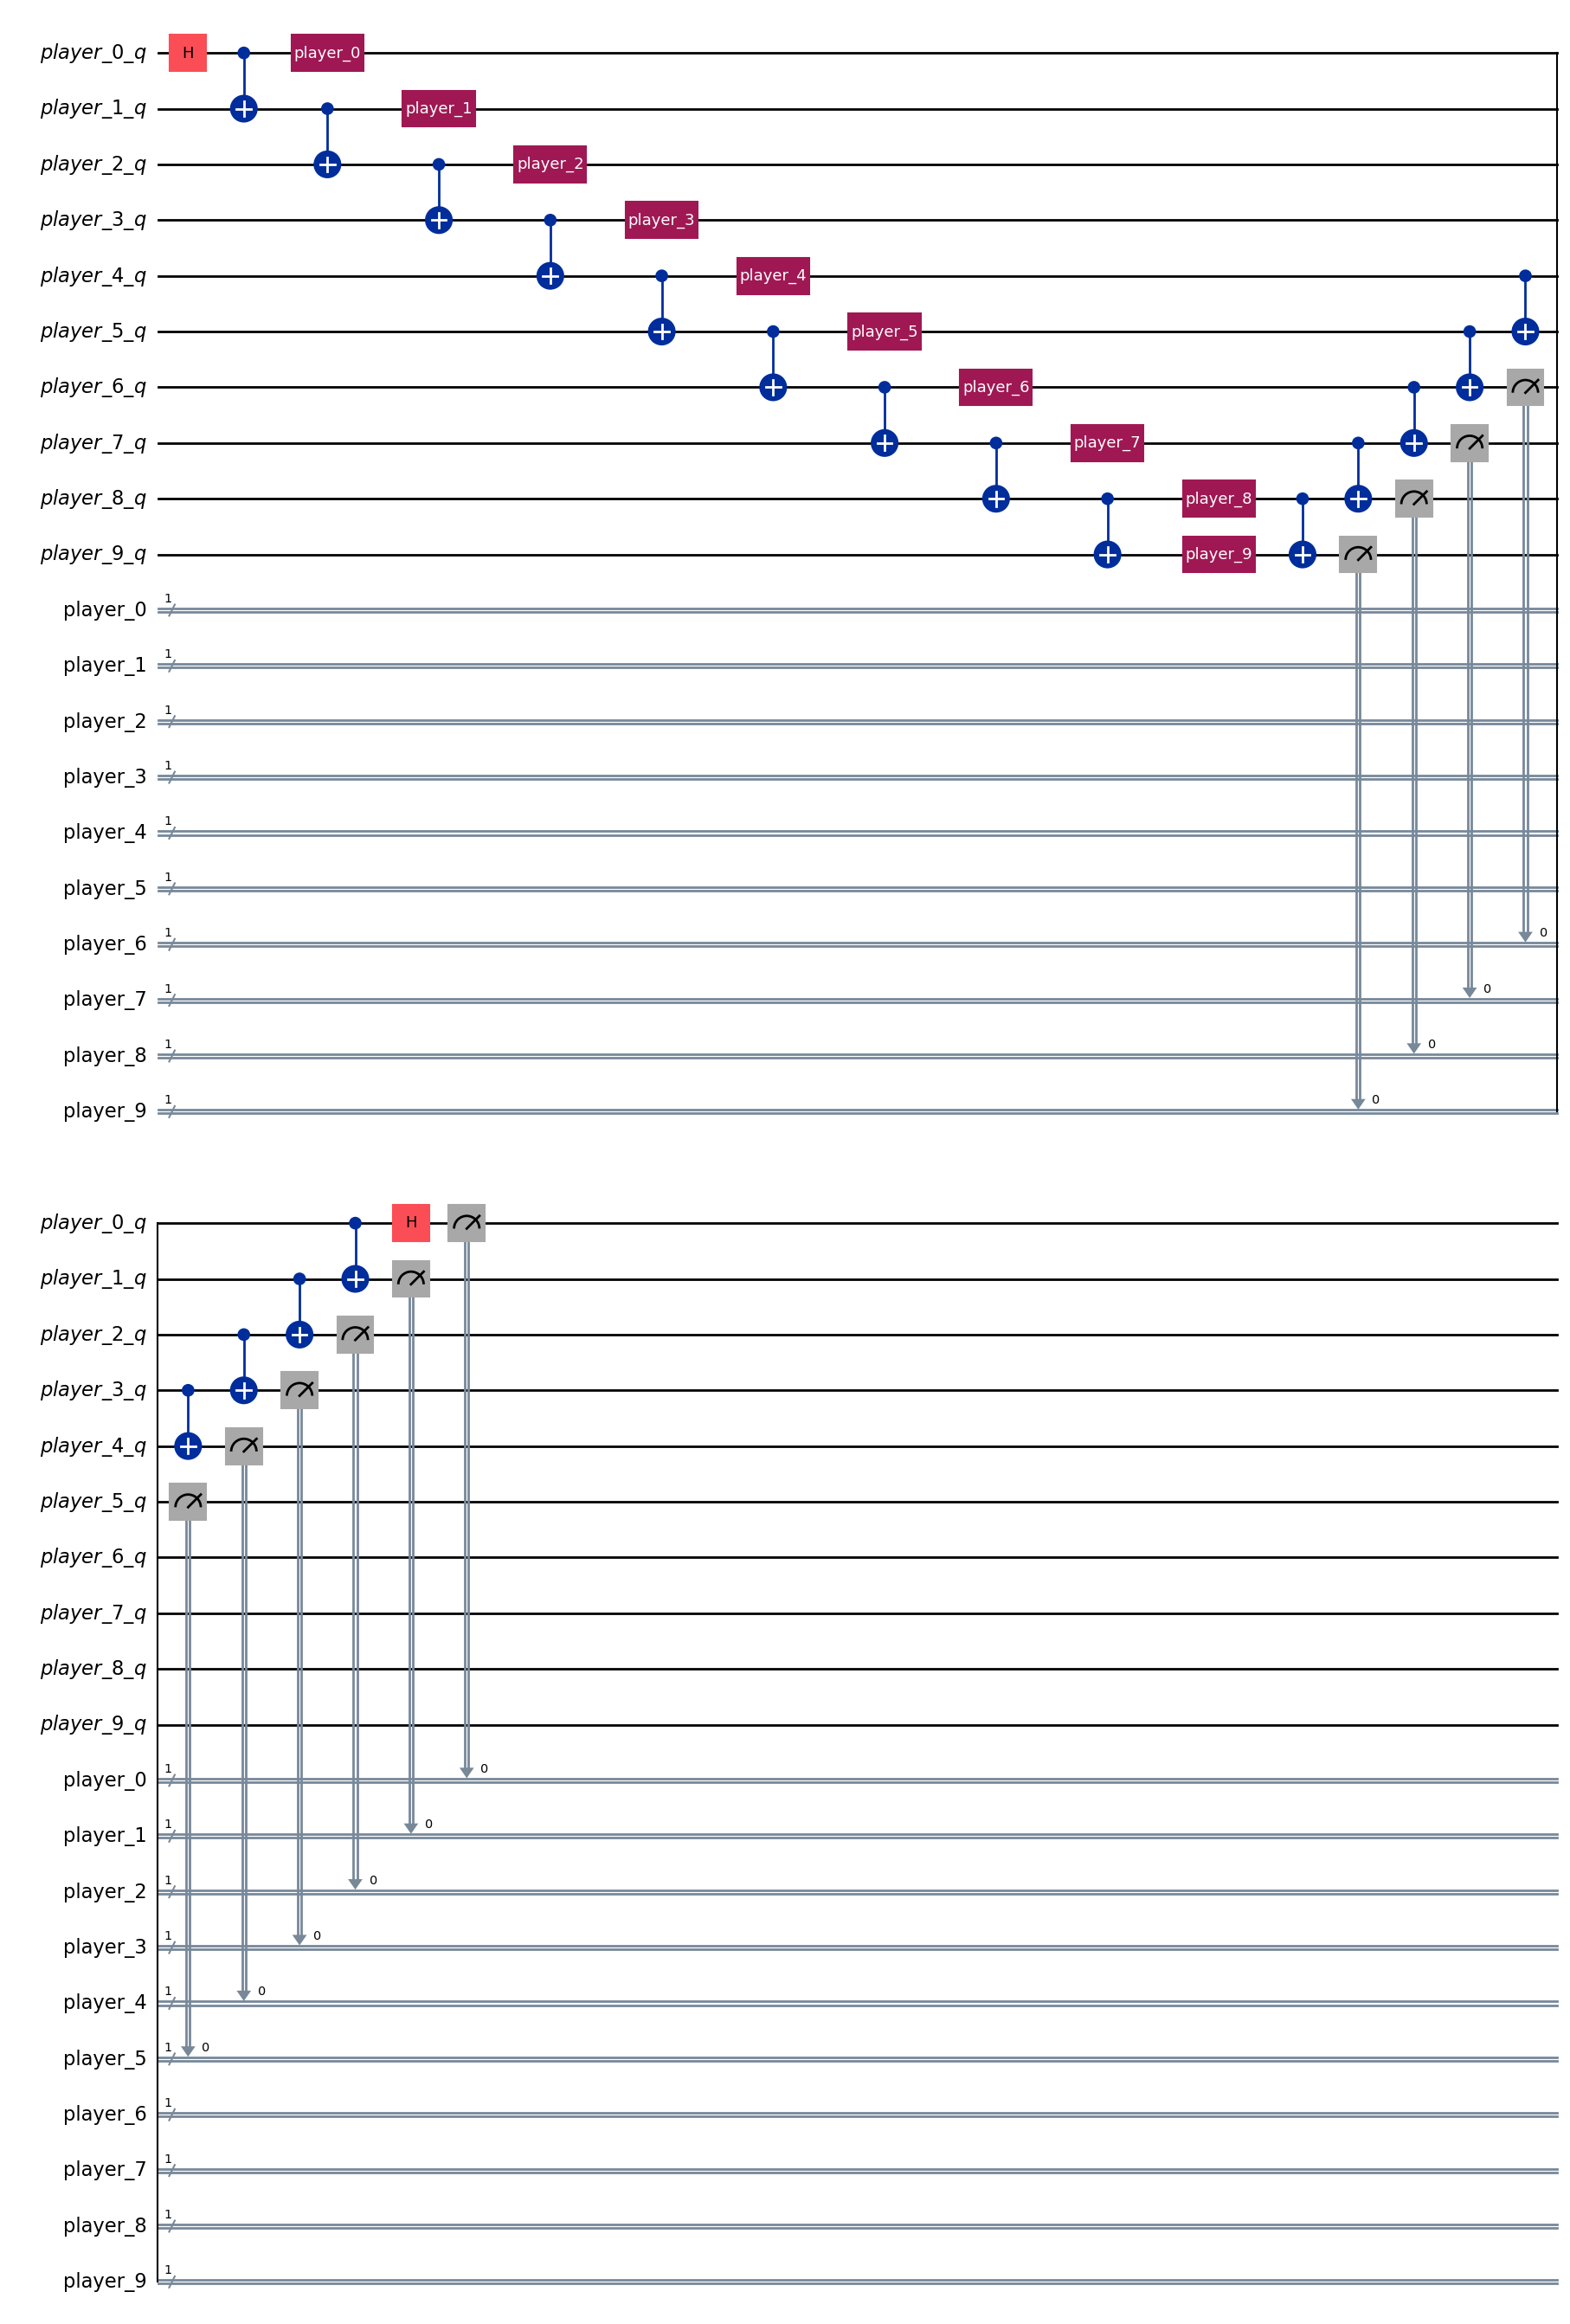

In [57]:
circuit.draw('mpl')

In [58]:
result = get_aer_result(circuit)
result_df = pd.DataFrame(result)

In [59]:
payoffs = prisoners_dilemma_payoff_calculator(result_df)

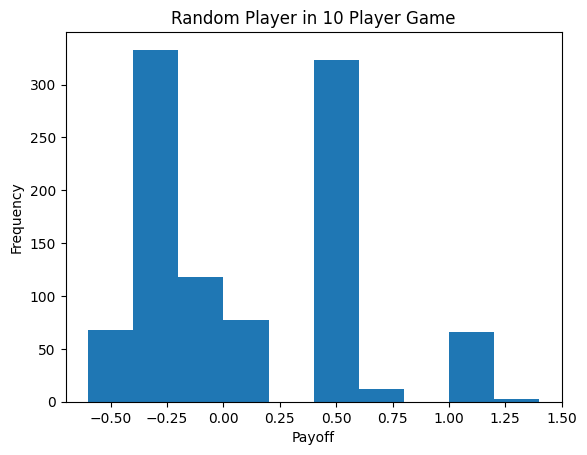

In [60]:
plotted_player = 'player_1'

n_bins = sorted(payoffs[plotted_player].unique())
plt.hist(payoffs[plotted_player])
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.title(f'Random Player in {n_players} Player Game')
plt.show()